# Learning From Data HW5

https://work.caltech.edu/homework/hw5.pdf

## 1 Linear Regression Error

Expected in-sample error with respect to $\mathcal D$ is then given by

$$ \mathbb E_{\mathcal D}[E_{in}(\mathbf w_{lin})] = \sigma^2 \left( 1 - \frac{d+1}{N} \right) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sigma = 0.1
# d = 8

def expected_in_sample_error(sigma, d ,N):
    return sigma**2 * (1-((d+1)/N))

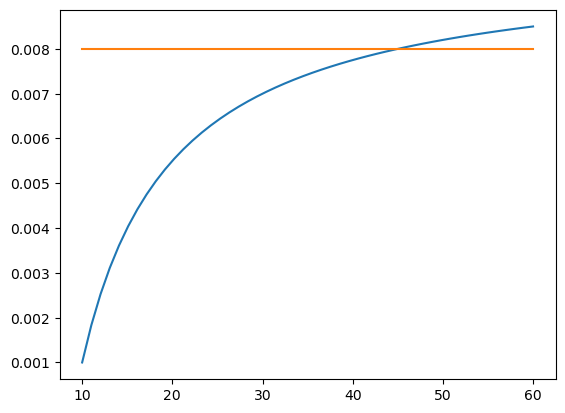

In [8]:
NN = np.linspace(10, 60)
plt.plot(NN, expected_in_sample_error(0.1, 8, NN))
plt.plot([10, 60], [0.008, 0.008])
plt.show()

So the smallest number is 100, c.

## 2 Nonlinear Transforms

 The graph is obviously a Hyperbola, since origin is positive, so $\tilde w_1 < 0$ and $\tilde w_2 > 0$.
 The answer is d.

After transformation we have that $d_{VC} = \tilde d +1 $ where $\tilde d+1 = 15$ (number of outputs of $\Phi$)
The answer is c, 15

## 4 Gradient Descent

Answer of 4 is e.

In [10]:
import numpy as np

def E(x):
    
    u = x[0]
    v = x[1]
    
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

In [11]:
def gradE(x):
    u = x[0]
    v = x[1]
    return np.array([
        2*(u*np.exp(v) - 2*v*np.exp(-u))*(np.exp(v) + 2*v*np.exp(-u)),
        2*(u*np.exp(v) - 2*v*np.exp(-u))*(u*np.exp(v) - 2*np.exp(-u))
    ])

In [17]:
def gradient_descent(E, gradE, x0, tol, eta):
    
    x = x0.copy()
    iters = 0
    err = E(x)
    us = [x[0]]
    vs = [x[1]]
    
    while err > tol:
        grad = gradE(x)
        x = x - eta*grad
        us.append(x[0])
        vs.append(x[1])
        iters+=1
        err = E(x)
        
        if iters > 500:
            print("Didn't converge")
            return
    return (x, err, iters, us, vs)

In [18]:
x0 = np.array([1, 1])

final_uv, err, iters, us, vs = gradient_descent(E, gradE, x0, 1e-14, 0.1)
print("Final coordinate:", final_uv)
print("Final err:", err)
print("Iterations:", iters)

Final coordinate: [0.04473629 0.02395871]
Final err: 1.2086833944220747e-15
Iterations: 10


In [19]:
us

[1,
 -0.3695429931968397,
 0.03052069035126309,
 0.10752311419899835,
 0.06564482581488218,
 0.047841170621718825,
 0.044999463099433715,
 0.04475601902934548,
 0.04473774604067707,
 0.044736390817507084,
 0.04473629039778207]

In [20]:
vs

[1,
 0.21392055362457985,
 -0.5079340454438057,
 -0.12221025557350329,
 -0.015166559876933133,
 0.0184898992267451,
 0.023499251696793233,
 0.023924296470397774,
 0.023956174796613786,
 0.023958538922248602,
 0.023958714099141746]

So the number of iterations is 10, d.

(u, v) is near (0.045, 0.024), e.

## 7 coordinate descent

In [21]:
def E(u, v):
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

def dEdu(u, v):
    return 2*(u*np.exp(v) - 2*v*np.exp(-u))*(np.exp(v) + 2*v*np.exp(-u))

def dEdv(u, v):
    return 2*(u*np.exp(v) - 2*v*np.exp(-u))*(u*np.exp(v) - 2*np.exp(-u))

def coordinate_descent(E, dEdu, dEdv, u0, v0, tol=1e-14, eta=0.1):
    u, v = u0, v0
    us = [u]
    vs = [v]
    for it in range(15):
        u = u - eta*dEdu(u, v)
        us.append(u)
        vs.append(v)
        v = v - eta*dEdv(u, v)
        us.append(u)
        vs.append(v)
    return u, v, E(u, v), 15, us, vs

In [22]:
final_u, final_v, err, its, us, vs = coordinate_descent(E, dEdu, dEdv, 1.0, 1.0)
print("Final coordinate:", final_u, final_v)
print("Final err:", err)
print("Iterations:", its)

Final coordinate: 6.29707589930517 -2.852306954077811
Final err: 0.13981379199615315
Iterations: 15


So the error is close to 0.13, a.

## 8 Logistic Regression

In [23]:
def random_point():
    a = 2*np.random.rand()-1
    b = 2*np.random.rand()-1
    return a, b

In [31]:
def random_line():
    x0, y0 = random_point()
    x1, y1 = random_point()
    x = (y1 - y0)/(x1 - x0)
    y = y1 - x*x1
    return y, x

In [32]:
def generate_dataset(N, b, a):
    X = 2*np.random.rand(N, 3)-1
    X[:,0] = 1
    y = np.sign(b + a*X[:,1] - X[:,2])
    return X, y

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [56]:
class Logistic_model:
    
    def fit(self, X, y):
        eta = 0.01
        N = X.shape[0]
        w = np.zeros(X.shape[1])
        prev_w = np.ones(X.shape[1])
        epoch = 0
        
        while True:
            prev_w = w
            for n in np.random.permutation(N):
                i = np.random.randint(0, N)
                gradE = -y[i]*X[i,:] / (1 + np.exp(y[i] * w.dot(X[i,:])))
                w = w - eta * gradE


            epoch += 1
            if np.linalg.norm(w - prev_w) < 0.01:
                self.w = w
                break
        return epoch
        
    def predict(self, X):
        return np.sign(X @ self.w)
    
    def cross_entropy_error(self, X, y):
        N = X.shape[0]
        errs = []
        for n in range(N):
            errs.append(np.log(1 + np.exp(-y[n] * self.w.dot(X[n,:]))))
        return np.mean(errs)

In [57]:
num_epochs = []
cross_entropy_errors = []
        
for experiment in range(1, 100):
    
    b, a = random_line()
    X, y = generate_dataset(100, b, a)
    lm = Logistic_model()
    epochs = lm.fit(X, y)

    X_test, y_test = generate_dataset(2000, b, a)
    y_predicted = lm.predict(X_test)


    err = lm.cross_entropy_error(X_test, y_test)
    num_epochs.append(epochs)
    cross_entropy_errors.append(err)
    
    print("Epochs: ", num_epochs)
    print("Error: ", np.mean(cross_entropy_errors))

Epochs:  [290]
Error:  0.10464213737154834
Epochs:  [290, 310]
Error:  0.10131153019795747
Epochs:  [290, 310, 214]
Error:  0.09865974981166196
Epochs:  [290, 310, 214, 384]
Error:  0.10088318366620933
Epochs:  [290, 310, 214, 384, 326]
Error:  0.10210481562020961
Epochs:  [290, 310, 214, 384, 326, 349]
Error:  0.10556725118926791
Epochs:  [290, 310, 214, 384, 326, 349, 325]
Error:  0.1041527379353
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307]
Error:  0.09977116752370871
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253]
Error:  0.09826782592271688
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280]
Error:  0.09997863680369994
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306]
Error:  0.0995738560067919
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393]
Error:  0.1005153539254478
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346]
Error:  0.09969827267298023
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 28

Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 307, 321, 303, 318, 330, 279, 298, 290, 341, 312, 378, 299, 345, 322, 276, 324, 381, 282, 420]
Error:  0.10117556668934728
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 307, 321, 303, 318, 330, 279, 298, 290, 341, 312, 378, 299, 345, 322, 276, 324, 381, 282, 420, 270]
Error:  0.10169429751848863
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 307, 321, 303, 318, 330, 279, 298, 290, 341, 312, 378, 299, 345, 322, 276, 324, 381, 282, 420, 270, 297]
Error:  0.10201949881890506
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 4

Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 307, 321, 303, 318, 330, 279, 298, 290, 341, 312, 378, 299, 345, 322, 276, 324, 381, 282, 420, 270, 297, 270, 299, 360, 359, 393, 262, 407, 339, 353, 399, 356, 302, 353, 376, 266, 308, 336, 327, 350, 360, 364, 368]
Error:  0.10205820832903145
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 307, 321, 303, 318, 330, 279, 298, 290, 341, 312, 378, 299, 345, 322, 276, 324, 381, 282, 420, 270, 297, 270, 299, 360, 359, 393, 262, 407, 339, 353, 399, 356, 302, 353, 376, 266, 308, 336, 327, 350, 360, 364, 368, 483]
Error:  0.1018419182723887
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 

Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 307, 321, 303, 318, 330, 279, 298, 290, 341, 312, 378, 299, 345, 322, 276, 324, 381, 282, 420, 270, 297, 270, 299, 360, 359, 393, 262, 407, 339, 353, 399, 356, 302, 353, 376, 266, 308, 336, 327, 350, 360, 364, 368, 483, 351, 204, 411, 322, 390, 176, 298, 381, 352, 335, 371, 407, 355, 319, 510, 376, 350]
Error:  0.10218309888596981
Epochs:  [290, 310, 214, 384, 326, 349, 325, 307, 253, 280, 306, 393, 346, 328, 316, 352, 339, 366, 324, 403, 282, 399, 326, 291, 302, 429, 271, 285, 260, 245, 297, 255, 307, 321, 303, 318, 330, 279, 298, 290, 341, 312, 378, 299, 345, 322, 276, 324, 381, 282, 420, 270, 297, 270, 299, 360, 359, 393, 262, 407, 339, 353, 399, 356, 302, 353, 376, 266, 308, 336, 327, 350, 360, 364, 368, 483, 351, 204, 411, 322, 390, 176, 298, 381, 352, 335, 371, 407, 355, 319, 510, 376, 350, 315]
Error:  0.1023781

So the E_out is close to 0.1, d.

And average epoch is 350, a.

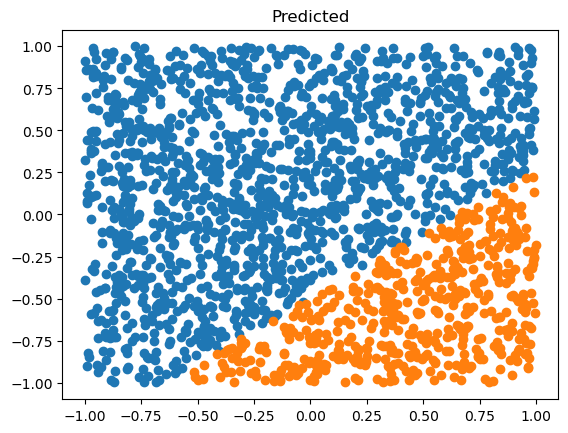

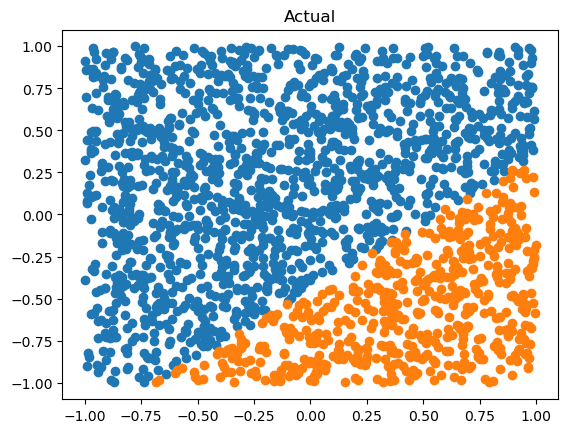

In [58]:
ibelow = np.where(y_predicted==-1)
iabove = np.where(y_predicted==1)
plt.scatter(X_test[ibelow,1], X_test[ibelow,2])
plt.scatter(X_test[iabove,1], X_test[iabove,2])
plt.title("Predicted")
plt.show()

ibelow = np.where(y_test==-1)
iabove = np.where(y_test==1)
plt.scatter(X_test[ibelow,1], X_test[ibelow,2])
plt.scatter(X_test[iabove,1], X_test[iabove,2])
plt.title("Actual")
plt.show()

## 10 PLA as SGD

For PLA we have the update loop

$ w = w + y_n x_n $ for wrongly classified point ($y_n \neq w^T x_n$)

For SGD we have the update loop

$w = w - \eta \nabla e_n(w) $

So let $\eta=1$ for simplicity.

We have to pick $e_n$ so that $\nabla e_n \approx - y_n x_n $ for wrongly classified points and $\nabla e_n \approx 0 $ for correctly classified points.

So e is corect.